In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
# preprocessing the data
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
X_processed=Sc.fit_transform(X)

In [7]:
X_processed

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [139]:
# creating the model for clustering
from sklearn.cluster import HDBSCAN
hdb=HDBSCAN(min_cluster_size=10,min_samples=5)
hdb.fit(X_processed)

HDBSCAN(min_cluster_size=10, min_samples=5)

In [140]:
labels=hdb.fit_predict(X_processed)

In [141]:
labels

array([-1,  4,  1,  4, -1,  4,  1, -1,  1,  4,  1, -1,  1,  4,  1,  4, -1,
        4, -1, -1, -1,  4,  1,  4,  1,  4, -1, -1, -1, -1,  1,  4,  1, -1,
        1,  4,  1,  4, -1, -1,  3, -1,  3,  3, -1,  4,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  0,  2,  0,  3,  0,  2,  0,  2,  0,  3,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  3,  0,  2,  0,  3,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  3,  0,  2,  0,  2,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0,  2,
       -1,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [142]:
# number of clusters without noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [143]:
#number of points that is considered as  noise
n_noise_ = list(labels).count(-1)
n_noise_

32

In [159]:
supervised=pd.DataFrame(dataset)

In [160]:
supervised["clustered_group"]=labels
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clustered_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


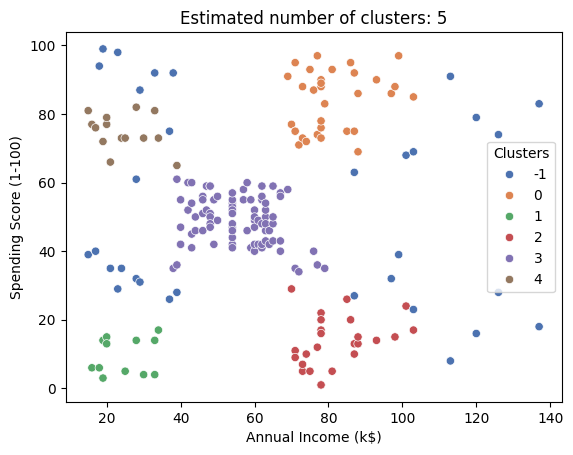

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = supervised, x = supervised.columns[3], y = supervised.columns[4], hue = supervised.columns[5],
                    legend = "full", palette = "deep")
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.legend(title="Clusters")
plt.show()

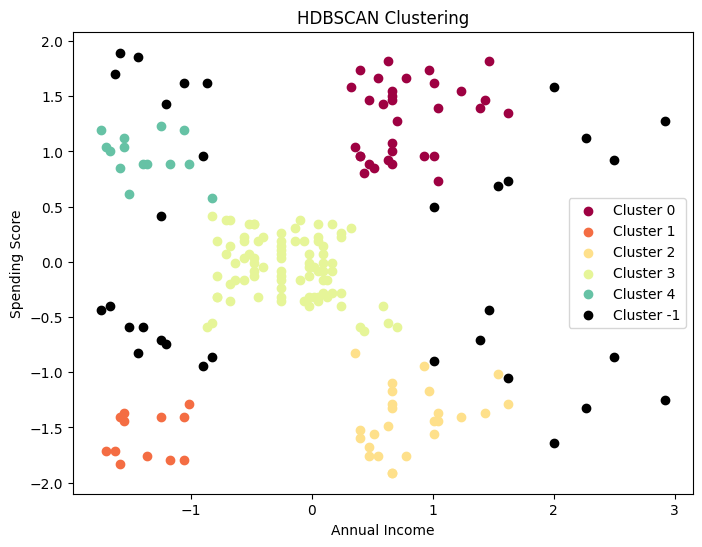

In [162]:
# Unique labels (-1 represents noise points)- plotting graph bu
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Black for noise
        color = [0, 0, 0, 1]
    plt.scatter(X_processed[labels == label, 0], X_processed[labels == label, 1], c=[color], label=f'Cluster {label}')

plt.title("HDBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()